In [1]:
import matplotlib.pyplot as plt
from dysts.base import get_attractor_list
import dysts.flows
import math
from mpl_toolkits.mplot3d import Axes3D
import os
import sys
import torch
import tqdm

sys.path.insert(0, f'{os.path.curdir}/../')

from validyna.data import scale_trajectory_group

In [2]:
data = {}
for name in tqdm.tqdm(get_attractor_list()):
    Attractor = getattr(dysts.flows, name)
    attractor = Attractor()
    if len(attractor.ic) != 3:
        continue
    data[name] = attractor.make_trajectory(500000)

  2%|█▉                                                                                 | 3/131 [00:03<02:38,  1.24s/it]/home/lstreit/anaconda3/envs/chaos/lib/python3.9/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(
  5%|████▍                                                                              | 7/131 [00:10<02:45,  1.33s/it]/home/lstreit/anaconda3/envs/chaos/lib/python3.9/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(
  7%|█████▋                                                                             | 9/131 [00:15<03:27,  1.70s/it]/home/lstreit/anaconda3/envs/chaos/lib/python3.9/site-pack

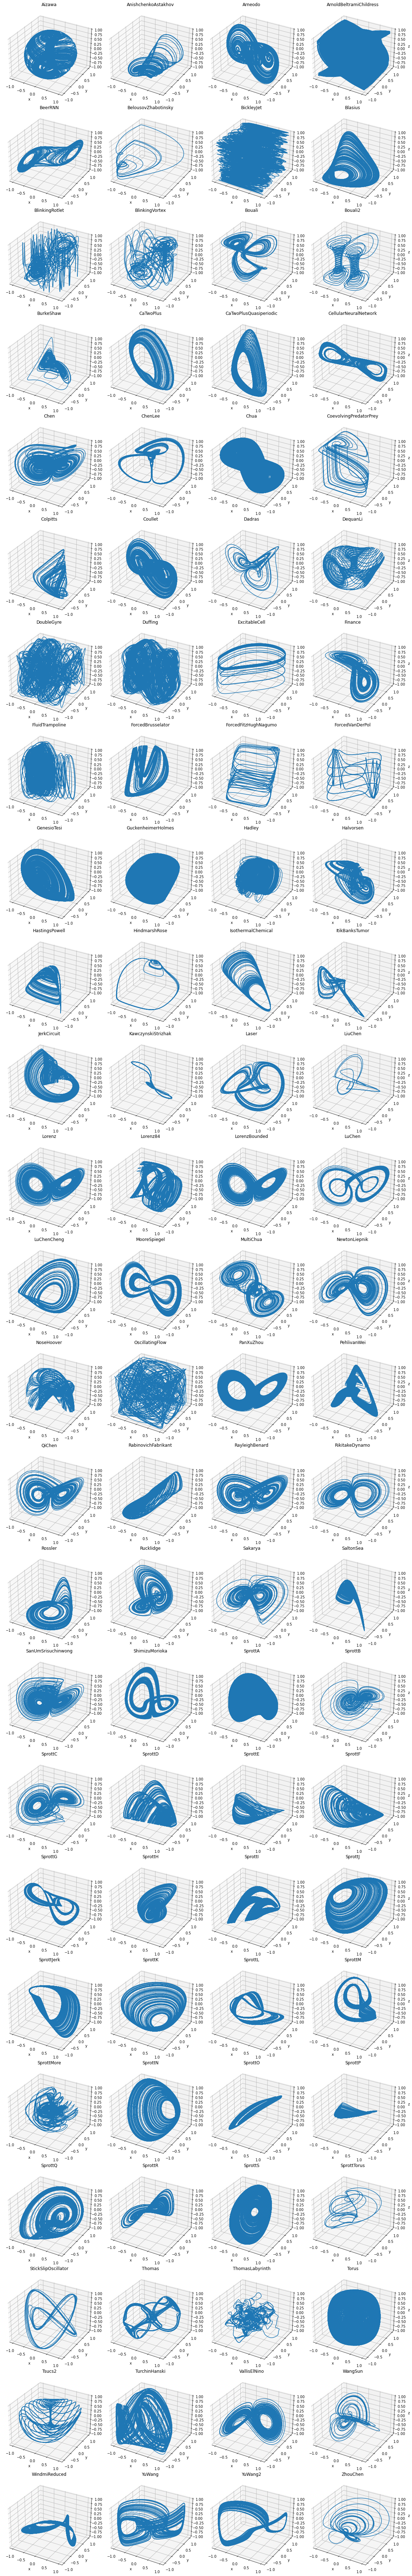

In [14]:
n = math.ceil(math.sqrt(len(data)))
fig = plt.figure(figsize=(16, 100))
for i, (name, traj) in enumerate(sorted(data.items())):
    
    traj = scale_trajectory_group_new(torch.Tensor(traj).unsqueeze(dim=0)).numpy()[0]
    ax = fig.add_subplot(25, 4, i+1, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(name)
    ax.plot(xs=traj[:, 0], ys=traj[:, 1], zs=traj[:, 2])
fig.tight_layout()

In [4]:
for name in get_attractor_list():
    Attractor = getattr(dysts.flows, name)
    attractor = Attractor()
    if 'Lorenz' in name:
        print(f'{name} {len(attractor.ic)}')

HyperLorenz 4
Lorenz 3
Lorenz84 3
Lorenz96 4
LorenzBounded 3
LorenzCoupled 6
LorenzStenflo 4


In [6]:
import sys
import os
sys.path.append(os.path.abspath('../'))
from validyna.data import load_data_dictionary


data_dir = f'../data/default(length=200-pts_per_period=50-resample=True-seed=2022)'
data_dirs = {
    'train': f'{data_dir}/train(count=100-ic_noise=0.01-ic_scale=1)',
    'val': f'{data_dir}/val(count=20-ic_noise=0.01-ic_scale=1)',
    'test': f'{data_dir}/test(count=30-ic_noise=0.05-ic_scale=1.001)',
}
lorenz_datasets = {set_name: [attractor for attractor, _ in load_data_dictionary(path).items() if 'Lorenz' in attractor]
                       for set_name, path in data_dirs.items()}
lorenz_datasets

Loading ../data/default(length=200-pts_per_period=50-resample=True-seed=2022)/train(count=100-ic_noise=0.01-ic_scale=1)
Loading ../data/default(length=200-pts_per_period=50-resample=True-seed=2022)/val(count=20-ic_noise=0.01-ic_scale=1)
Loading ../data/default(length=200-pts_per_period=50-resample=True-seed=2022)/test(count=30-ic_noise=0.05-ic_scale=1.001)


{'train': ['LorenzBounded', 'Lorenz84', 'Lorenz'],
 'val': ['LorenzBounded', 'Lorenz84', 'Lorenz'],
 'test': ['LorenzBounded', 'Lorenz84', 'Lorenz']}